<a href="https://colab.research.google.com/github/d4rk3dge/iitm_hackathon/blob/main/applestocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
ticker = input("Enter Ticker: ")
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter End date (YYYY-MM-DD): ")


data = yf.download(ticker, start=start_date, end=end_date)
df= data

print(data)



Enter Ticker: AAPL
Enter start date (YYYY-MM-DD): 2020-01-01
Enter End date (YYYY-MM-DD): 2024-01-03
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.152634   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.441437   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.018684   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.675285   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.844353   
...                ...         ...         ...         ...         ...   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.

In [ ]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152634,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441437,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675285,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200


In [ ]:
df['date'] = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152634,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441437,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675285,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200,2020-01-08


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])] )

fig.update_layout(
    title = "Green Finance Chart MUFIN.NS",
    yaxis_title = "Price ($)",
    xaxis_rangeslider_visible= False)

fig.show()

<Axes: >

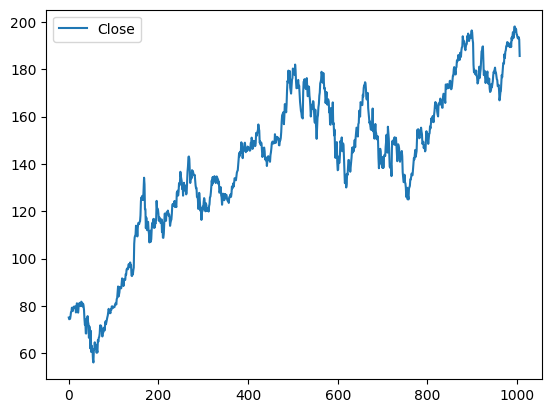

In [ ]:
df.drop(['date','Volume'],axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.plot.line(y="Close",use_index=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x = df[['Open','Close','High','Low','Adj Close']]
y = df['Close']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mse:{mse} r2:{r2}')

mse:0.18585538827781814 r2:0.9998310529571859


In [ ]:
diff = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])
diff

,Actual,Predicted
0,178.179993,178.217900
1,141.559998,141.561301
2,150.699997,150.656199
3,173.070007,172.993801
4,129.639999,129.716500
...,...,...
197,154.500000,154.576299
198,131.460007,131.342200
199,108.860001,109.025449
200,127.099998,127.162298


<ipython-input-21-6f93269b9891>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-6f93269b9891>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




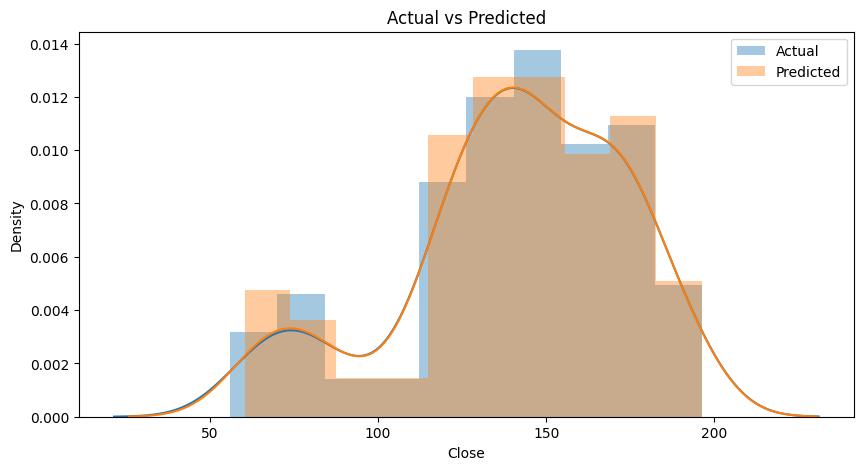

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()